In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [2]:
#Load the testing and training data
df_test = pd.read_csv('data/Testing.csv')
df_train = pd.read_csv('data/Training.csv')

In [3]:
#Load the label encoder
le = preprocessing.LabelEncoder()

In [4]:
#Determine features and target of training and testing data
X_train = df_train.iloc[:,0:131]
x_test = df_test.iloc[:,0:131]
y_train_labelled = df_train.iloc[:,132]
Y_test_labelled = df_test.iloc[:,132]

In [5]:
#Encode labels
y_train = le.fit_transform(y_train_labelled)
Y_test = le.fit_transform(Y_test_labelled)

In [6]:
#Decision Tree Classifier
model_DT = DecisionTreeClassifier(class_weight='balanced')
model_DT.fit(X_train,y_train)
print("Accuracy Score of Decision tree Classifier : "+str(accuracy_score(Y_test, model_DT.predict(x_test))*100)+"%")

Accuracy Score of Decision tree Classifier : 97.61904761904762%


In [7]:
#Naive Bayes Classifier
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)
print("Accuracy Score of Naive Bayes Classifier : "+str(accuracy_score(Y_test, model_NB.predict(x_test))*100)+"%")

Accuracy Score of Naive Bayes Classifier : 100.0%


In [8]:
#Support Vector Classifier
model_SVC = SVC(kernel='linear', C=1)
model_SVC.fit(X_train,y_train)
print("Accuracy Score of Support Vector Classifier : "+str(accuracy_score(Y_test, model_SVC.predict(x_test))*100)+"%")

Accuracy Score of Support Vector Classifier : 100.0%


In [9]:
#Softmax Classifier
model_SM = LogisticRegression(random_state=0, multi_class='multinomial')
model_SM.fit(X_train,y_train)
print("Accuracy Score of Softmax Classifier : "+str(accuracy_score(Y_test, model_SM.predict(x_test))*100)+"%")

Accuracy Score of Softmax Classifier : 97.61904761904762%


In [14]:
#PCA
accuracy_DT = []
accuracy_SVC = []
accuracy_NB = []
features = []
for i in range(41):
    pca = PCA(n_components=(i+1))
    X_train_pca = pca.fit_transform(X_train)
    x_test_pca = pca.fit_transform(x_test)
    model_DT.fit(X_train_pca, y_train)
    model_NB.fit(X_train_pca, y_train)
    model_SVC.fit(X_train_pca, y_train)
    accuracy_DT.append(accuracy_score(Y_test, model_DT.predict(x_test_pca))*100)
    accuracy_NB.append(accuracy_score(Y_test, model_NB.predict(x_test_pca))*100)
    accuracy_SVC.append(accuracy_score(Y_test, model_SVC.predict(x_test_pca))*100)
    features.append(i+1)

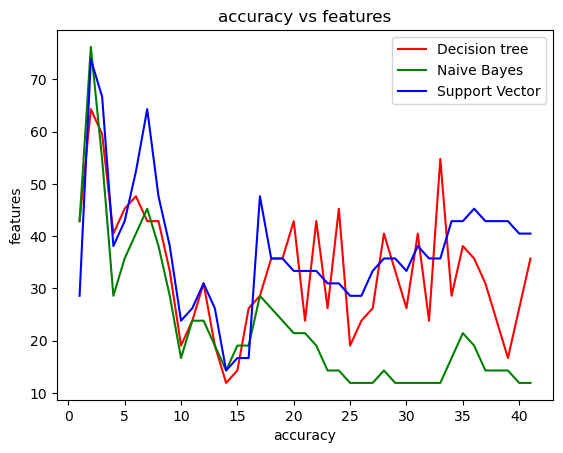

In [17]:
#Plotting
plt.plot(features, accuracy_DT, color='r', label='Decision tree')
plt.plot(features, accuracy_NB, color='g', label='Naive Bayes')
plt.plot(features, accuracy_SVC, color='b', label='Support Vector')

plt.xlabel("accuracy")
plt.ylabel("features")
plt.title("accuracy vs features")

plt.legend()

plt.show()

In [12]:
#Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
print("Accuracy Score of Random Forest Classifier : "+str(accuracy_score(Y_test, rf.predict(x_test))*100)+"%")

Accuracy Score of Random Forest Classifier : 97.61904761904762%
